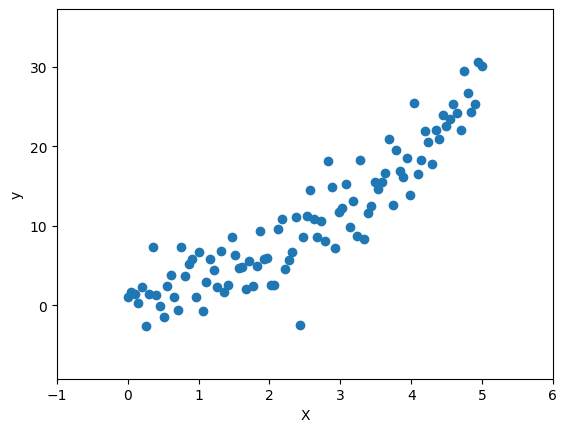

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 변수
w0=2.3
w1=1
num_data=100
noise=np.random.normal(0,3,num_data)

# 데이터 생성
X=np.linspace(0,5,num_data)
y=w0+w1*(X**2)+noise

#시각화
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.margins(0.2)
plt.show()

In [2]:
print(X)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

In [3]:
print(w1*(X**2)+noise)

[-1.24549928e+00 -6.71012767e-01 -8.62420545e-01 -2.01616468e+00
 -6.25089337e-03 -4.90908366e+00 -8.70238686e-01  4.99839435e+00
 -9.68991693e-01 -2.44115131e+00 -3.73742760e+00  1.52105685e-01
  1.51295703e+00 -1.31324760e+00 -2.88440363e+00  5.02063776e+00
  1.31895748e+00  2.90035095e+00  3.52618841e+00 -1.27256769e+00
  4.37234535e+00 -3.06905099e+00  6.39816134e-01  3.49092543e+00
  2.15402620e+00  4.37932350e-02  4.48489712e+00 -6.74631408e-01
  2.57883768e-01  6.35074834e+00  4.05896781e+00  2.33172741e+00
  2.51562560e+00 -3.13826269e-01  3.26646323e+00  1.74083359e-01
  2.67159230e+00  7.08667441e+00  3.55363978e+00  3.67067488e+00
  2.78586203e-01  1.88620424e-01  7.32269718e+00  8.54246016e+00
  2.27840572e+00  3.33834521e+00  4.45460510e+00  8.86313735e+00
 -4.75559047e+00  6.32946673e+00  8.96677799e+00  1.22675774e+01
  8.56761755e+00  6.29039616e+00  8.35887729e+00  5.83767133e+00
  1.59146480e+01  1.25501751e+01  4.95601833e+00  9.41420530e+00
  9.92198118e+00  1.29949

In [5]:
X=X.reshape(-1,1) # 학습을 위한 차원 변환 진
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

seed=1234
np.random.seed(seed)

In [6]:
X,y=make_classification(n_samples=100,
                        n_features=2,
                        n_informative=2,#생성할 데이터셋에서 유의미한 특성의 수
                        n_redundant=0,
                        n_clusters_per_class=1,
                        n_classes=3, # 생성할 데이터셋의 타겟 클래스 수
                        random_state=1)

#데이터셋을 훈련 세트와 테스트 세트로 분할
X,X_test,y,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


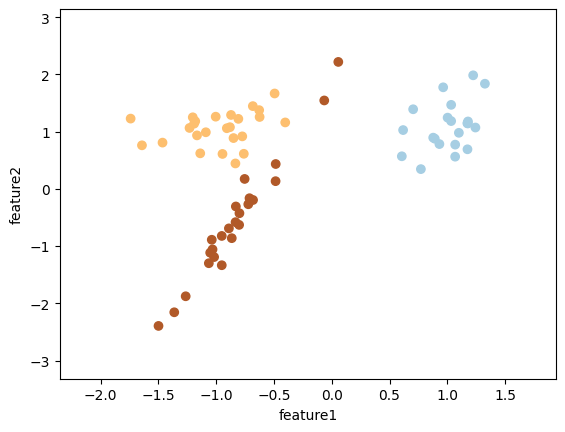

In [10]:
#데이터 시각화
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)

plt.xlabel('feature1')
plt.ylabel('feature2')

plt.margins(0.2)
plt.show()

In [11]:
# 정보 이득을 사용하는 결정 트리 분류기 생성
dt_entropy=DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=3)# 분기 진행 시작 조건인 노드 내 샘플 수


In [12]:
dt_entropy.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [13]:
dt_gini=DecisionTreeClassifier(criterion='gini',
                               max_depth=3,
                               min_samples_split=3)#분기 진행 시작 조건인 노드 내 샘플수
dt_gini.fit(X,y)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

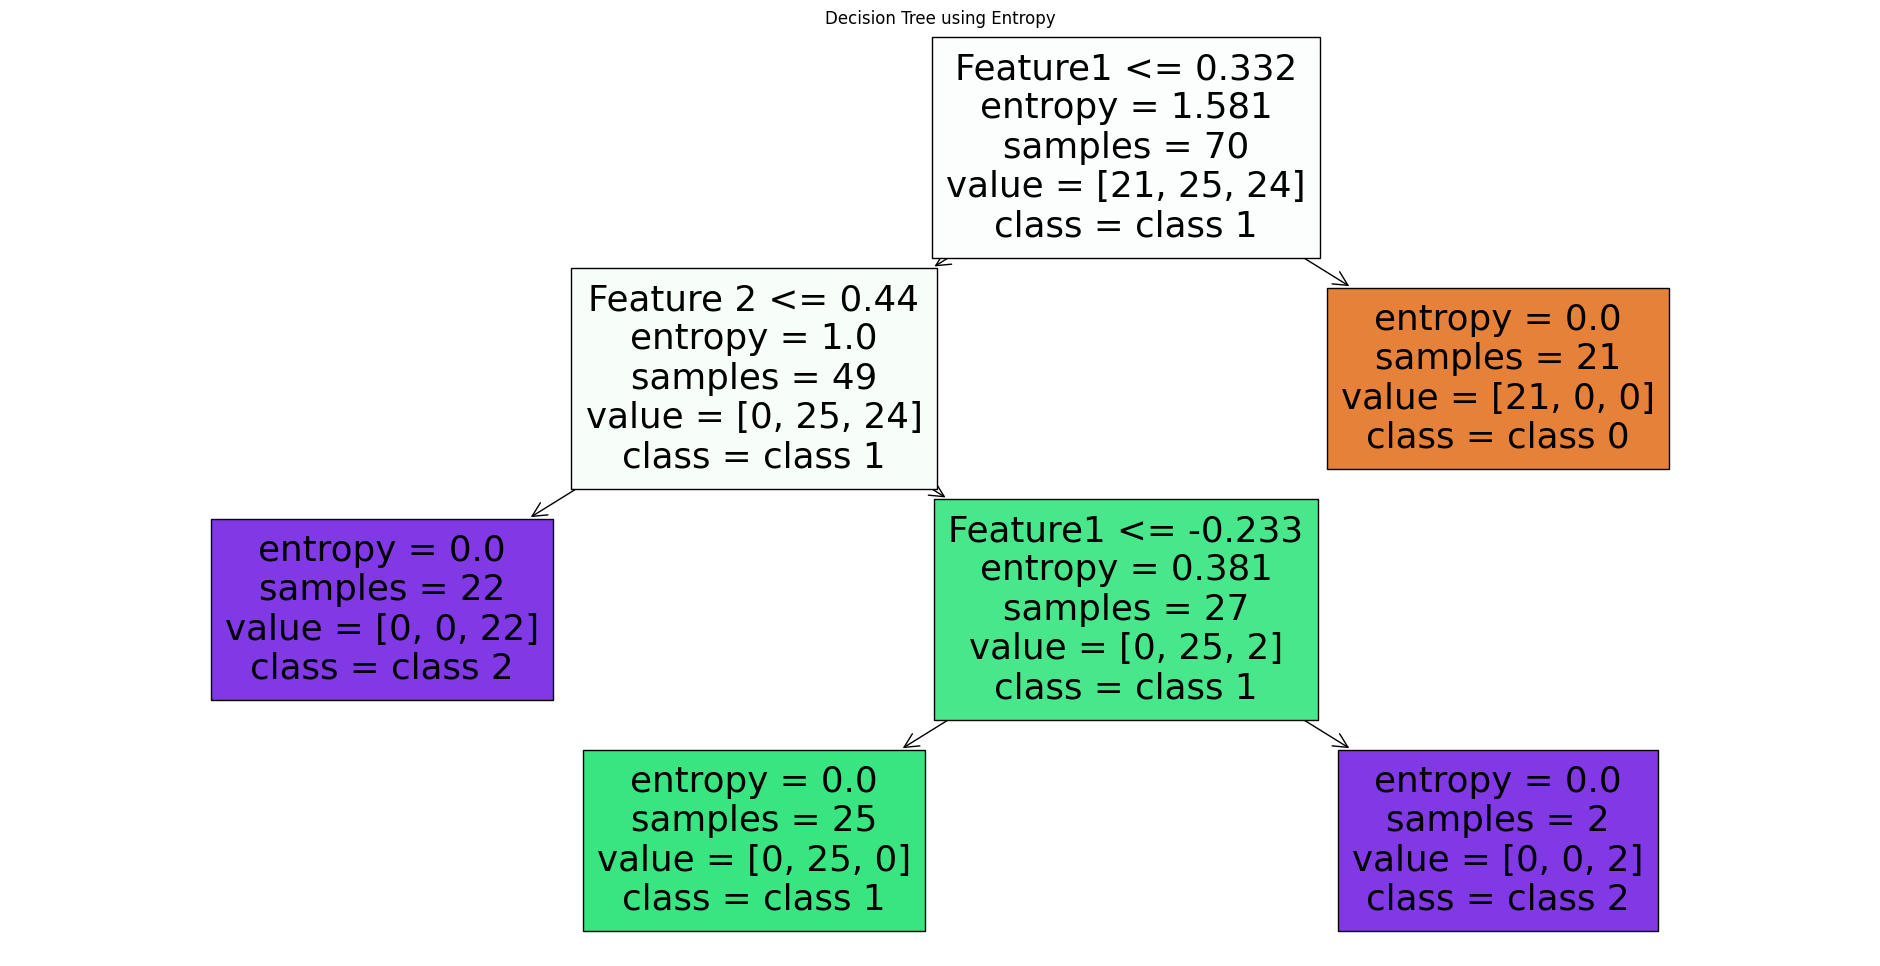

In [15]:
# 두 모델의 훈련된 구조를 확인
from sklearn.tree import plot_tree

#정보 이득을 사용한 결정 트리
plt.figure(figsize=(24,12))
plot_tree(dt_entropy,filled=True,
          feature_names=['Feature1','Feature 2'],
          class_names=['class 0','class 1','class 2'])

plt.title("Decision Tree using Entropy")
plt.show()

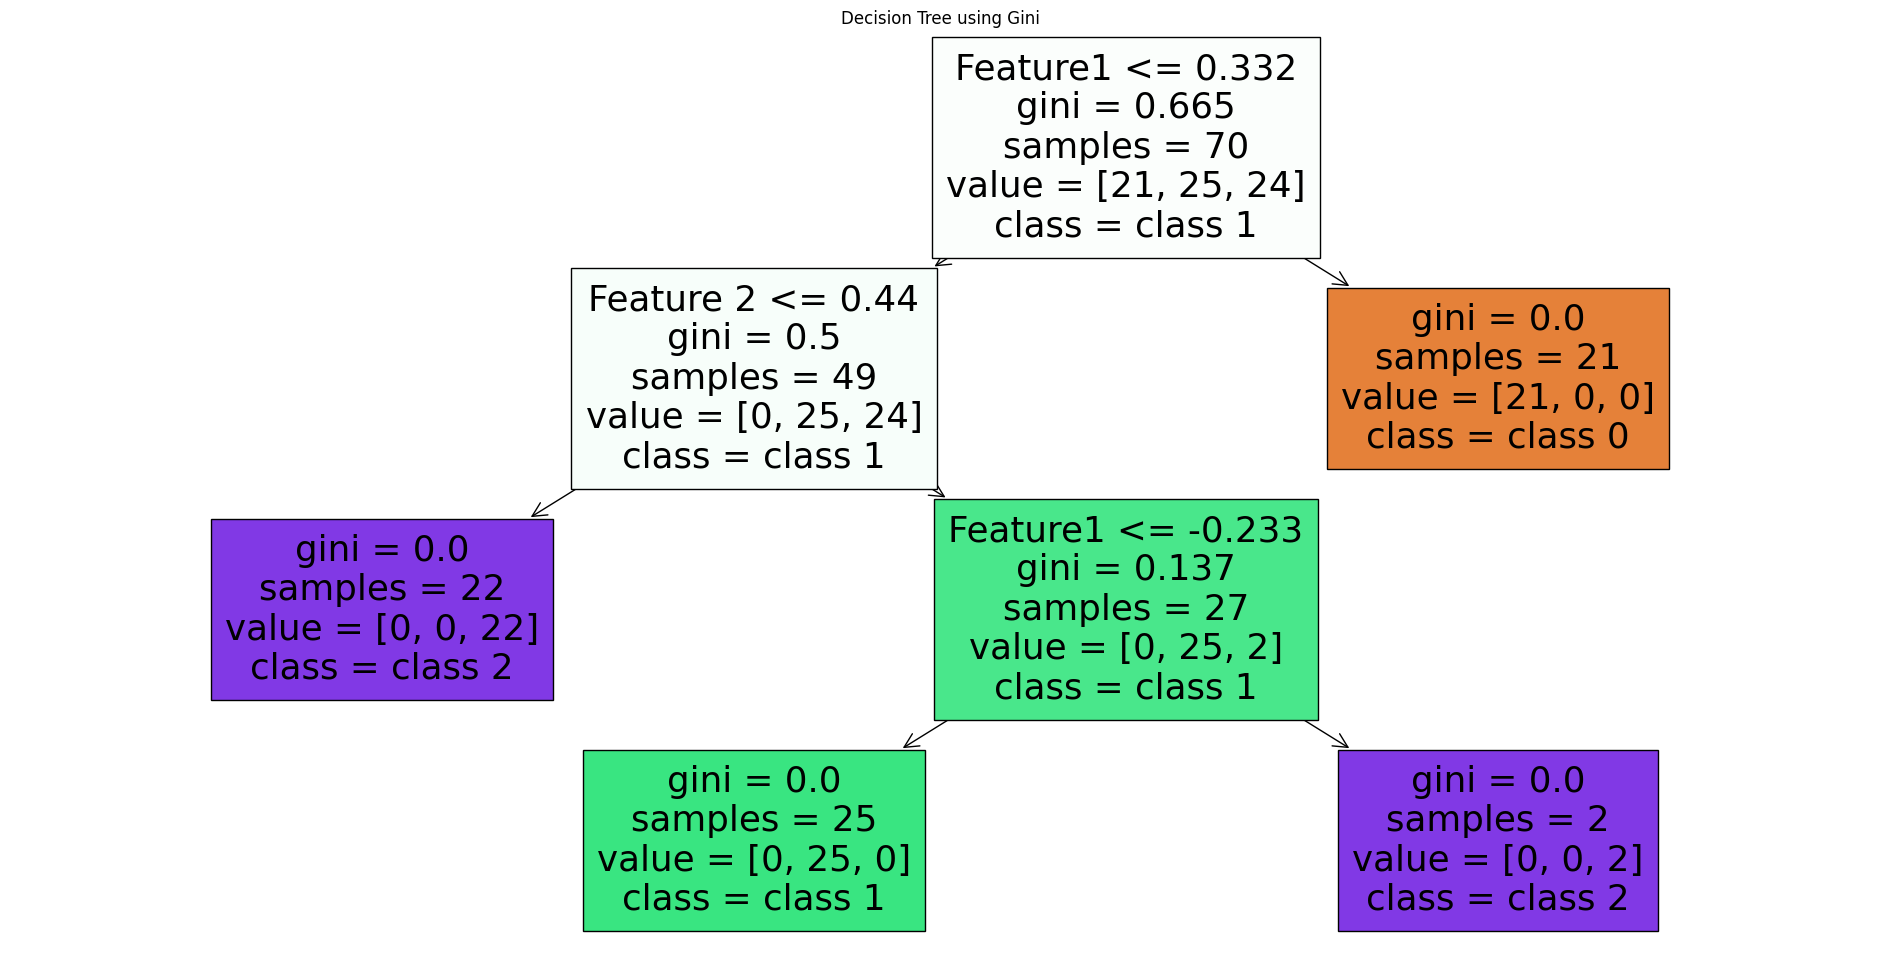

In [16]:
# 지니 불순도를 사용한 결정 트리
plt.figure(figsize=(24,12))
plot_tree(dt_gini,filled=True,
          feature_names=['Feature1','Feature 2'],
          class_names=['class 0','class 1','class 2'])

plt.title("Decision Tree using Gini")
plt.show()

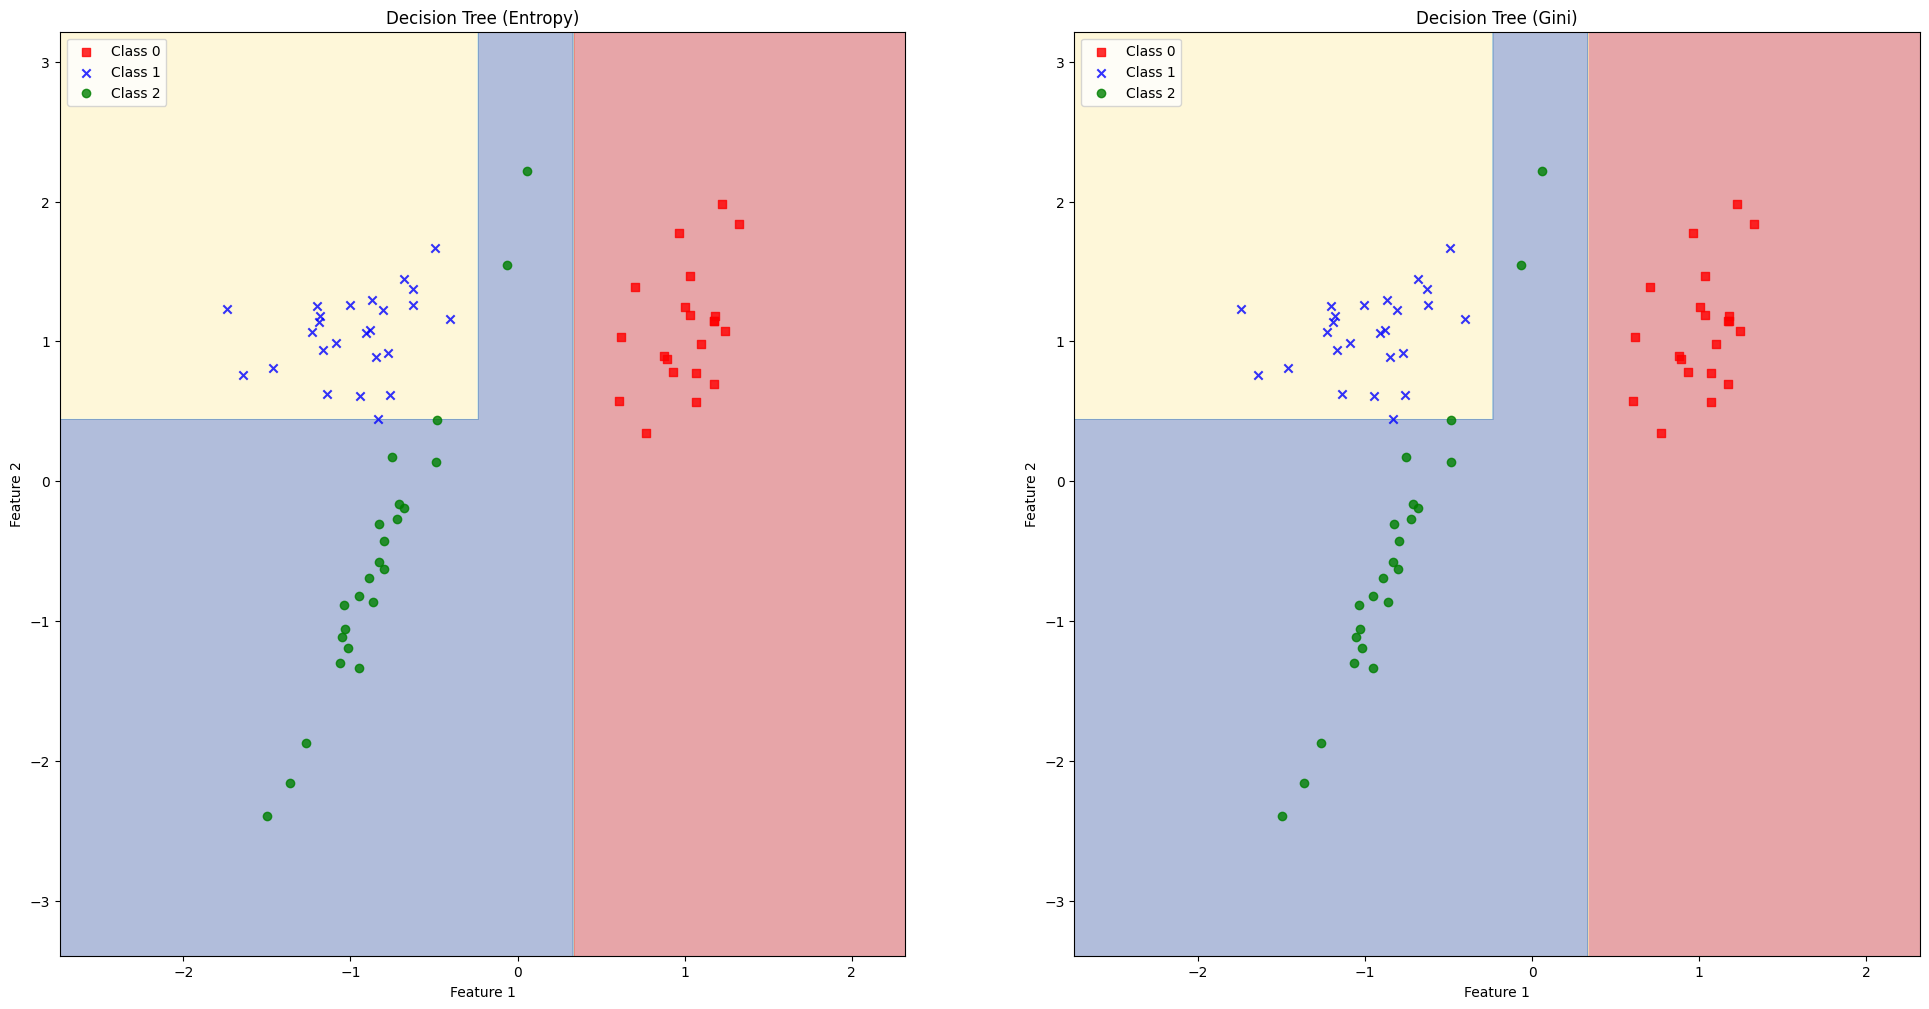

In [17]:
# 결정 경계 그려보기
import numpy as np

# 데이터와 결정 경계를 시각화하는 함수
def plot_decision_boundaries(X, y, model, title):
    # 마커와 색상 설정
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = plt.cm.RdYlBu

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    # 데이터셋의 샘플 플로팅
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title(title)

# 첫 번째 특성과 두 번째 특성을 이용한 데이터셋 시각화
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plot_decision_boundaries(X, y, dt_entropy, "Decision Tree (Entropy)")
plt.subplot(1, 2, 2)
plot_decision_boundaries(X, y, dt_gini, "Decision Tree (Gini)")
plt.show()

Accuracy on Entropy : 96.67 %
Accuracy on Gini : 96.67 %


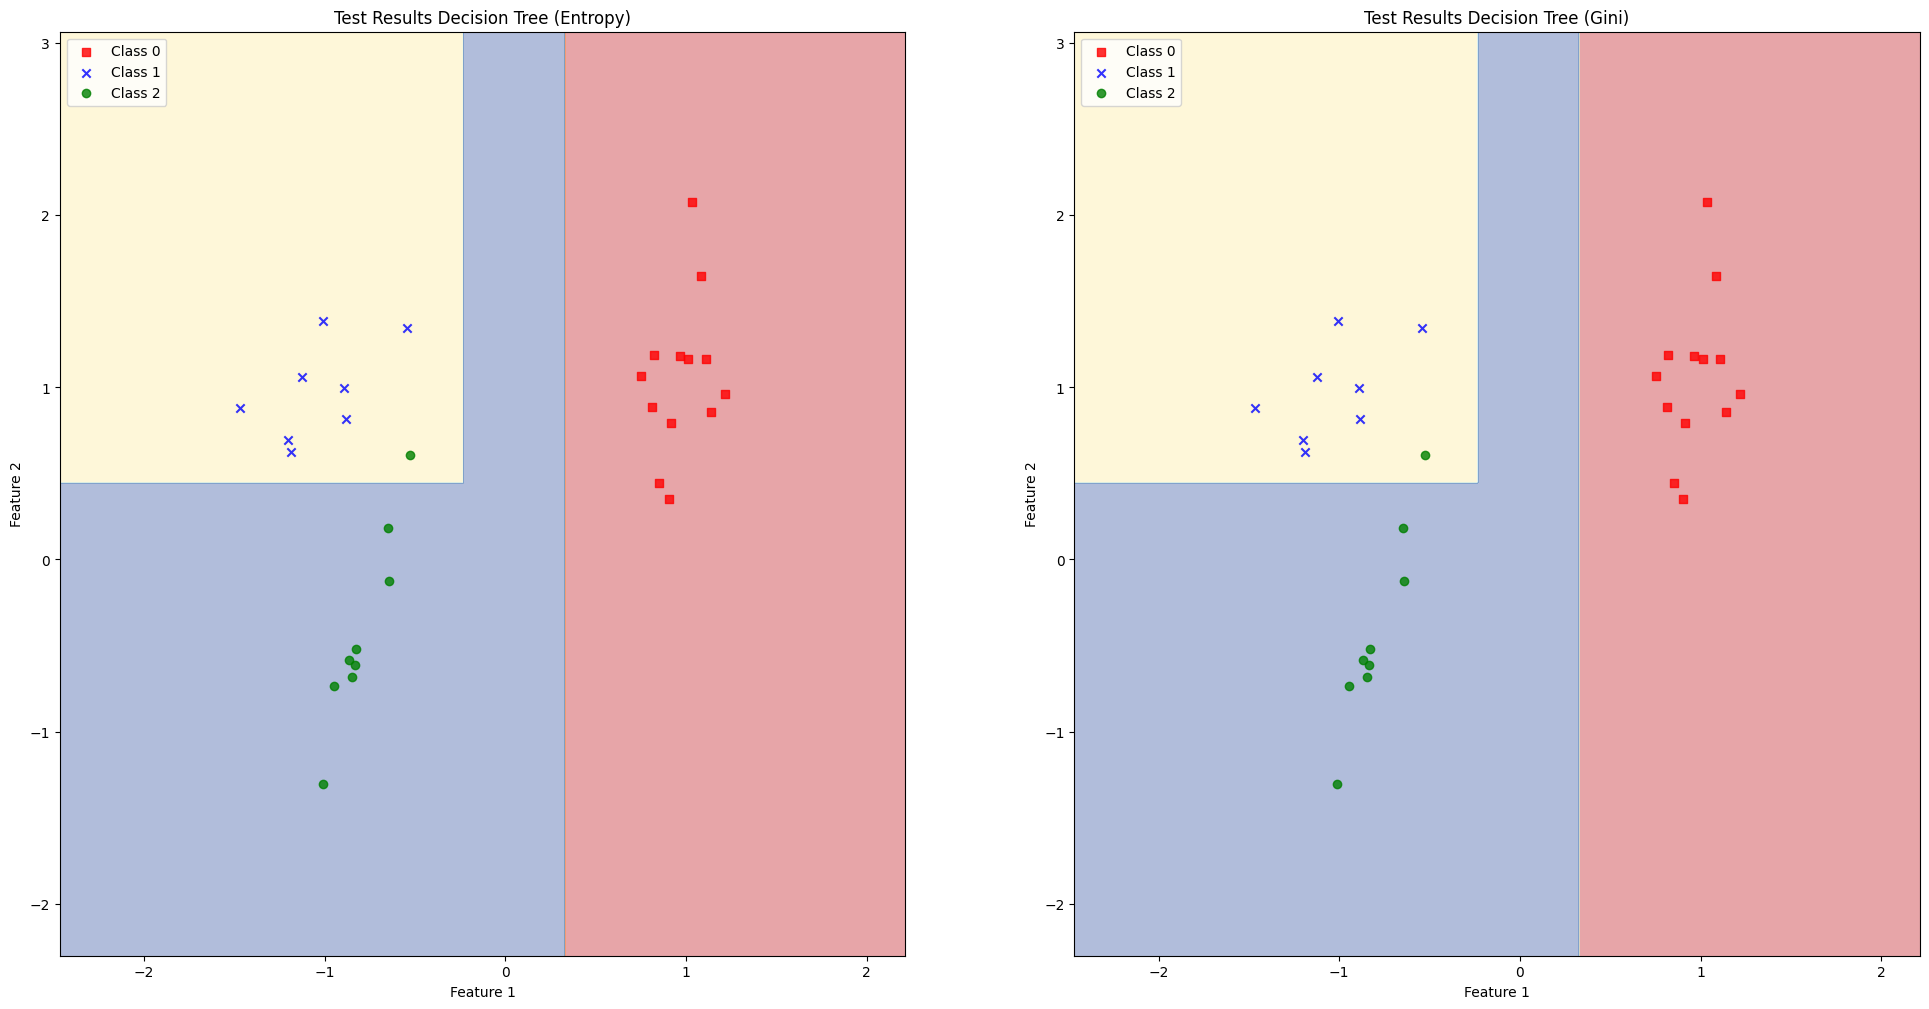

In [18]:
# 평가
y_pred = dt_entropy.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'Accuracy on Entropy : {acc*100:.2f} %')
y_pred = dt_gini.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'Accuracy on Gini : {acc*100:.2f} %')

plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plot_decision_boundaries(X_test, y_test, dt_entropy, "Test Results Decision Tree (Entropy)")
plt.subplot(1, 2, 2)
plot_decision_boundaries(X_test, y_test, dt_gini, "Test Results Decision Tree (Gini)")
plt.show()